In [1]:
from seedlings import *
from wordbank import *
from words import *
from top_dense import *

In [13]:
from scipy import stats
import pandas as pd
import numpy as np
from ggplot import *
import re

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
wordbank = WordBank(input="data/wb_cdi/wb_eng.csv")

In [20]:
top_graph, tau, p = top_kendall_threshold('data/output/seedlings/semgraphs', 
                                      wb=wordbank, wb_month='16', 
                                      source='SEEDLings')

print "threshold:   {}".format(top_graph.threshold)
print "kendall tau: {}".format(tau)
print "p-value:     {}".format(p)

threshold:   0.84
kendall tau: 0.349528013546
p-value:     1.49775385402e-17


In [5]:
seedlings = Seedlings('data/seedlings/basic_level_concat.csv')


In [19]:
graph_df = top_graph.top_n_dense(all=True)

def merge_counts(graph_df, seedlings_df):
    new_df = pd.merge(graph_df, 
                      seedlings_df[['basic_level', 'count']], 
                      left_on='word', 
                      right_on='basic_level').drop_duplicates('basic_level')
    return new_df

merged_df = merge_counts(graph_df, seedlings.data)

merged_df.to_csv("top_tau_seedlings.csv")

In [32]:
seed_graph = SemanticGraph(path='data/output/seedlings/semgraphs/cosine_0.79/semgraph_16', 
                          wb=wordbank, source="SEEDLings", sim_func='cos')

In [33]:
degree_distribution = seed_graph.degree_distr()

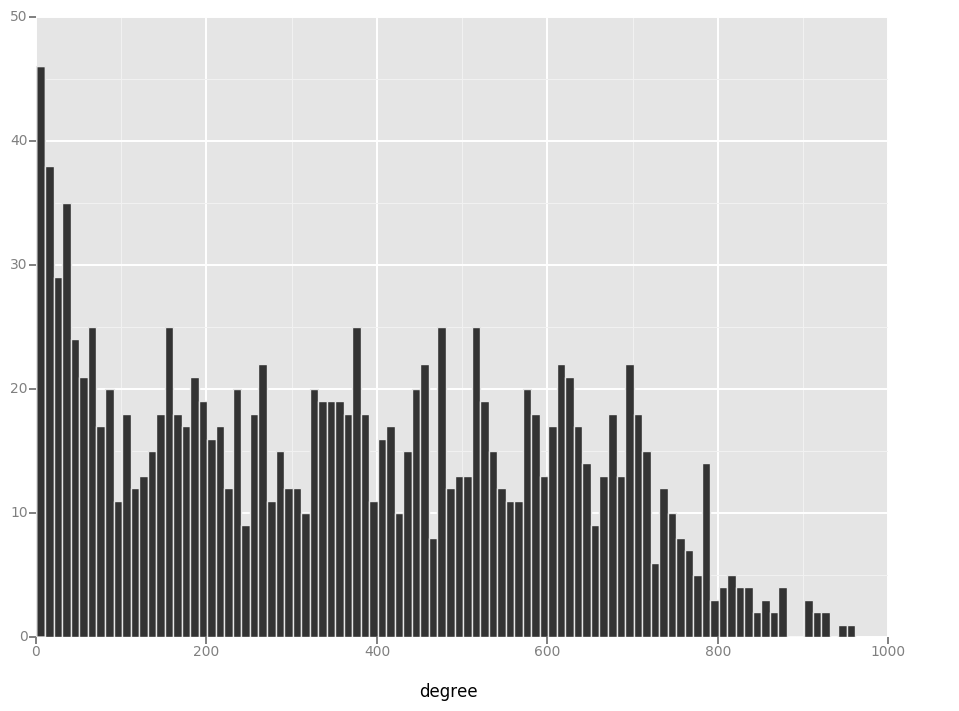

<ggplot: (289479941)>

In [34]:
ggplot(degree_distribution, aes(x='degree')) + geom_histogram(binwidth=10)